# S12_T01: Aprenentatge Supervisat - Regressions

## Nivell 1

### - Exercici 1: 
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
# import of basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data description: https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

# import the dataframe:
delay_df = pd.read_csv(r'..\DB\DelayedFlights.csv')

pd.set_option('display.max_columns', None) # show all columns

delay_df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Column description:
1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. CRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
16. DepDelay departure delay, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance in miles
20. TaxiIn taxi in time, in minutes
21. TaxiOut taxi out time in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
28. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

#### First of all, we need to clean a little bit the dataframe

In [67]:
delay_df.columns = [columns.lower() for columns in delay_df] 
delay_df.columns

Index(['unnamed: 0', 'year', 'month', 'dayofmonth', 'dayofweek', 'deptime',
       'crsdeptime', 'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum',
       'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [68]:
# Making a copy in case we need the original dataframe, and using a sample to be faster. If we want to use the full dataframe, we have to comment the ".sample(n = 10000, random_state=123)" part.
df = delay_df.copy(deep=True).sample(n = 10000, random_state=123)
df.shape

(10000, 30)

In [69]:
# Drop some columns with no usefull information:
# year: all flight are in 2008
# flightnum: is the way to call a specific flight, so no important information
# tailnum: "plate" of the aircraft
df.drop(['unnamed: 0', 'year', 'flightnum', 'tailnum'], axis=1, inplace=True)
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'actualelapsedtime', 'crselapsedtime',
       'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'taxiin', 'taxiout', 'cancelled', 'cancellationcode', 'diverted',
       'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')

In [70]:
# Let's create a function to take a look to null values
def null_percent(df):
    null = round(df.isnull().sum() / len(df) * 100,3)
    return null

In [71]:
null_values = null_percent(df)
null_values 

month                0.00
dayofmonth           0.00
dayofweek            0.00
deptime              0.00
crsdeptime           0.00
arrtime              0.42
crsarrtime           0.00
uniquecarrier        0.00
actualelapsedtime    0.50
crselapsedtime       0.01
airtime              0.50
arrdelay             0.50
depdelay             0.00
origin               0.00
dest                 0.00
distance             0.00
taxiin               0.42
taxiout              0.04
cancelled            0.00
cancellationcode     0.00
diverted             0.00
carrierdelay        35.66
weatherdelay        35.66
nasdelay            35.66
securitydelay       35.66
lateaircraftdelay   35.66
dtype: float64

In [72]:
df.shape

(10000, 26)

In [73]:
df.cancelled.describe()

count   10000.00
mean        0.00
std         0.02
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: cancelled, dtype: float64

In [74]:
# cancelled and cancellationcode: a cancelled flight can't arrive at time or have delay.
# We will delete the cancelled flights (code == 1), and then both columns
df.drop(df[df.cancelled == 1].index, inplace=True)
df.shape

(9994, 26)

In [75]:
df.cancelled.describe()

count   9994.00
mean       0.00
std        0.00
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        0.00
Name: cancelled, dtype: float64

In [76]:
# With diverted flights occurs the same: 
df.diverted.sum()

44

In [77]:
df.drop(df[df.diverted == 1].index, inplace=True)
df.diverted.sum()

0

In [78]:
df.drop(['cancelled', 'cancellationcode', 'diverted'], axis=1, inplace=True)
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'actualelapsedtime', 'crselapsedtime',
       'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'taxiin', 'taxiout', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [79]:
# Reset index to avoid further problems
df.reset_index(drop=True, inplace=True)

In [80]:
df.carrierdelay.count()

6434

In [81]:
# We saw a lot of missing values in the last columns (35%):
# 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay','lateaircraftdelay' are used to explain the reason of the delay, 
# but a delay of less than 15 minutes it isn't considered as delay, so this columns have NaN
# We can check that:
print(f'Maximum delay accepted, without consider it as delay: {df[df.weatherdelay.isnull()].arrdelay.max()} minutes')

# We will transform all these NaN to 0:
df.loc[df.arrdelay < 15, ['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay','lateaircraftdelay']] = 0
print(f'We now have {df.carrierdelay.count()} values in CarrierDelay')


Maximum delay accepted, without consider it as delay: 14.0 minutes
We now have 9950 values in CarrierDelay


In [82]:
null_values = null_percent(df)
null_values

month               0.00
dayofmonth          0.00
dayofweek           0.00
deptime             0.00
crsdeptime          0.00
arrtime             0.00
crsarrtime          0.00
uniquecarrier       0.00
actualelapsedtime   0.00
crselapsedtime      0.00
airtime             0.00
arrdelay            0.00
depdelay            0.00
origin              0.00
dest                0.00
distance            0.00
taxiin              0.00
taxiout             0.00
carrierdelay        0.00
weatherdelay        0.00
nasdelay            0.00
securitydelay       0.00
lateaircraftdelay   0.00
dtype: float64

In [83]:
shape1 = df.shape
shape1

(9950, 23)

The amount of null values now is very low (less than 1%) so we can drop this rows.
**This was before cleaning the diverted column. Without diverted flights, there is no more NaN**

In [84]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
shape2 = df.shape
print(shape2)
print(f'We have deleted {shape1[0] - shape2[0]} rows from a total of {shape1[0]}, that is {round((shape1[0] - shape2[0])*100/shape1[0],2)}%')

(9950, 23)
We have deleted 0 rows from a total of 9950, that is 0.0%


#### Obtaining information about Arrival Delay and other features

In [3]:
sns.set_theme(style='darkgrid', palette='dark')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (18, 8)}) # set font and plot size to be larger

In [4]:
# Let's see the distribution of ArrDelay
fig01 = sns.histplot(df, x = 'arrdelay', binwidth=10, kde = True)
plt.title('Arrival delay in minutes')
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (in minutes)')
plt.show()
fig01.figure.savefig(r'Plots\Fig01_Distribution_ArrivalDelay.png')


NameError: name 'df' is not defined

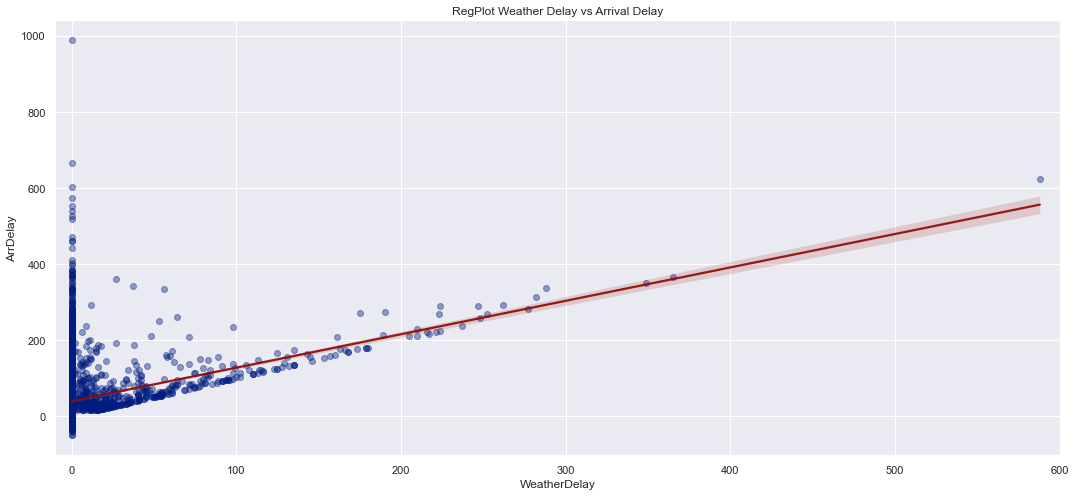

In [87]:
# Lets see the correlation and the regresion line between weather delay and arrival delay, to compare later, when we standarize the data
fig02 = sns.regplot(x = df['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9})
plt.title('RegPlot Weather Delay vs Arrival Delay')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')
plt.xlim(-10, 600)
plt.show()
fig02.figure.savefig(r'Plots\Fig02_RegPlot_WeatherDelay_vs_ArrivalDelay.png')

In [88]:
type(df['dayofmonth'].iloc[0])

numpy.int64

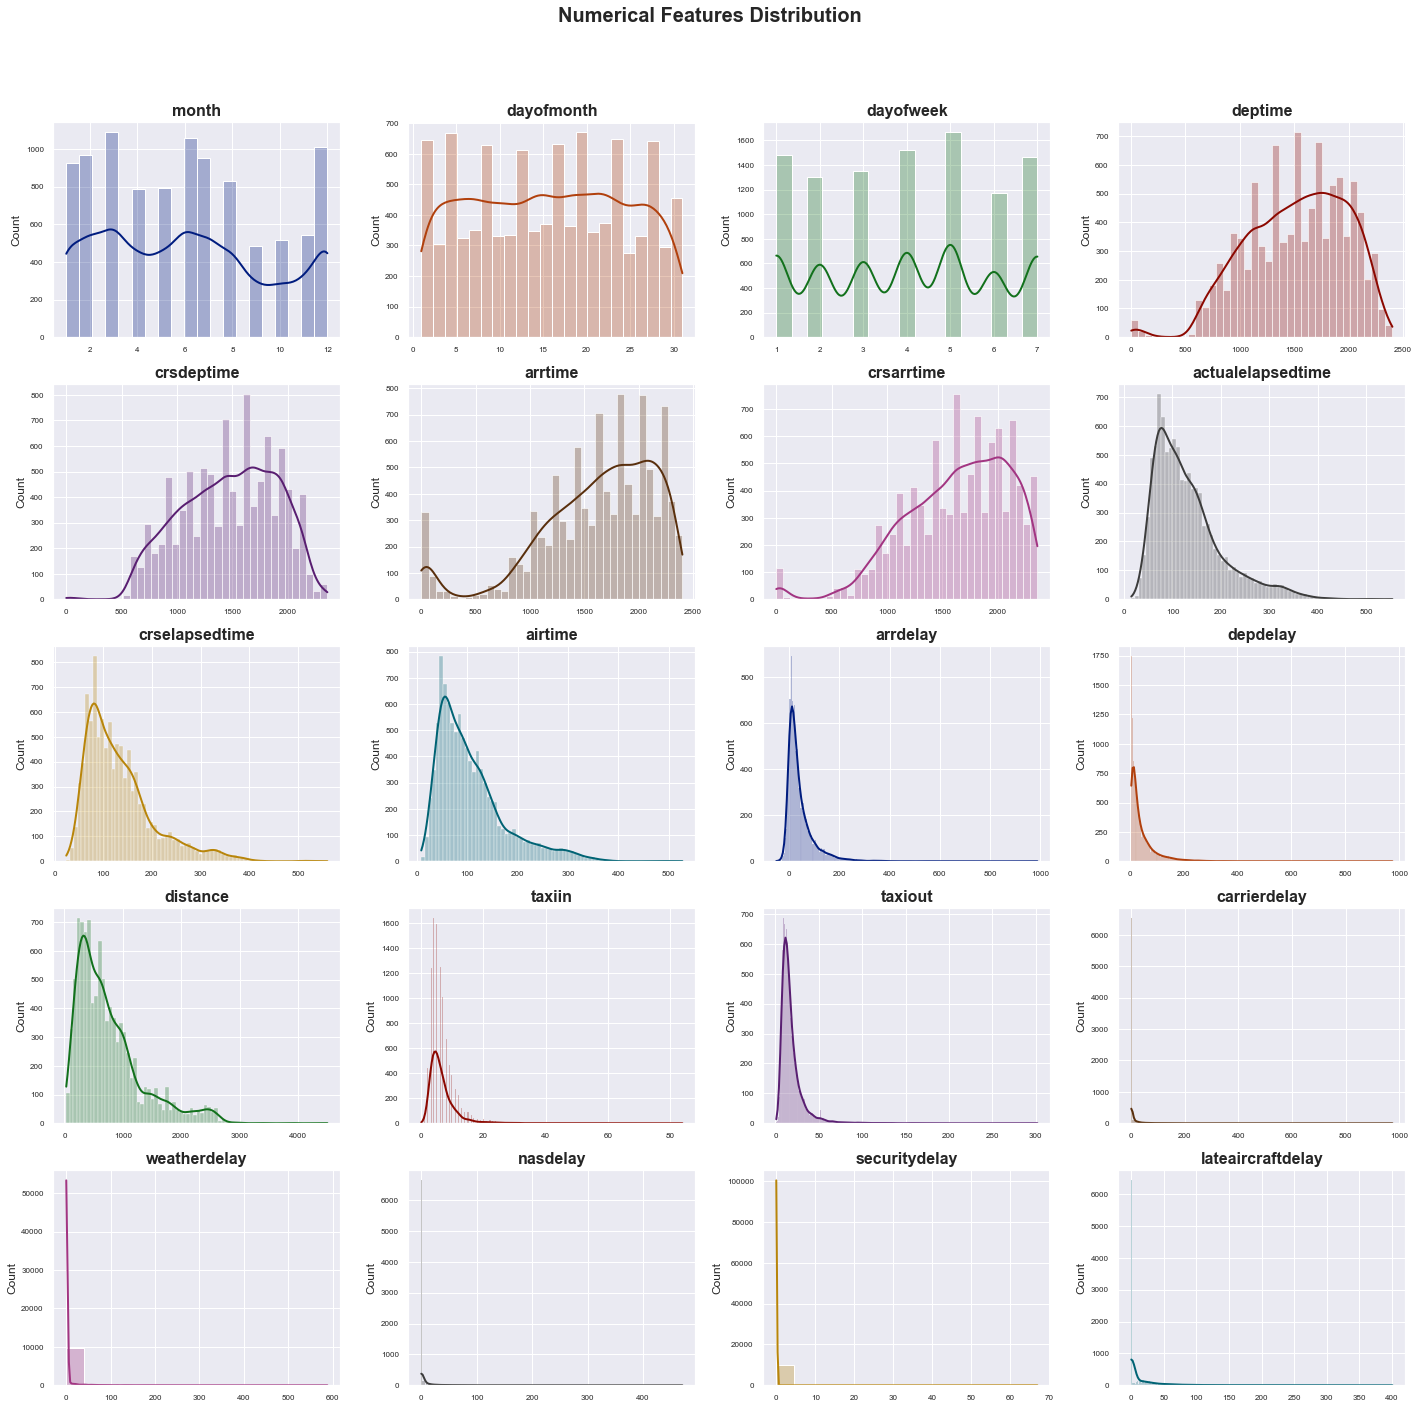

In [89]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig021, axes021 = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes021.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig021.tight_layout()
plt.subplots_adjust(top = 0.9)
fig021.suptitle('Numerical Features Distribution', fontsize = 20, fontweight = "bold")
fig021.savefig(r'Plots\Fig021_NumericalFeatures_Distribution.png')

#### Standarizing values

In [90]:
# We will split the columns, according to they type (numerical or categorical):
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include='object').columns
print(f'Numerical Columns names: \n{num_cols}')
print(f'Categorical Columns names: \n{cat_cols}')

Numerical Columns names: 
Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'actualelapsedtime', 'crselapsedtime', 'airtime',
       'arrdelay', 'depdelay', 'distance', 'taxiin', 'taxiout', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')
Categorical Columns names: 
Index(['uniquecarrier', 'origin', 'dest'], dtype='object')


In [91]:
# Before performing any regression, we need to standarize the numerical values. We will use StandardScaler:
from sklearn.preprocessing import StandardScaler

In [92]:
trans = StandardScaler()
df_stand = trans.fit_transform(df[num_cols])
df_stand = pd.DataFrame(df_stand, columns=num_cols)
df_stand.head()

,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,distance,taxiin,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,-0.60,-1.69,-1.01,1.35,1.52,-2.90,-3.49,0.67,0.59,0.74,-0.43,-0.58,0.76,-0.35,-0.07,-0.18,-0.14,-0.16,-0.04,-0.26
1,-1.18,0.96,1.51,-0.94,-1.07,-0.85,-1.10,-1.12,-0.96,-1.06,-0.21,0.00,-0.94,-0.76,-0.28,0.48,-0.14,-0.34,-0.04,-0.46
2,-0.31,-1.23,-1.51,0.40,0.38,0.26,0.20,0.60,0.62,0.76,-0.30,-0.31,0.71,-0.76,-0.35,-0.35,-0.14,-0.34,-0.04,0.26
3,-1.18,1.53,0.50,0.02,0.09,0.58,0.48,0.65,0.50,0.73,-0.18,-0.40,0.70,0.67,-0.43,-0.35,-0.14,0.74,-0.04,-0.40
4,-1.47,1.07,0.50,-0.83,-0.81,0.73,0.78,2.72,2.83,2.73,-0.50,-0.42,3.41,-0.15,0.63,-0.35,-0.14,-0.34,-0.04,-0.46


In [93]:
df_stand.describe()

,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,distance,taxiin,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
count,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00,9950.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.47,-1.69,-1.51,-3.38,-3.46,-2.96,-3.52,-1.65,-1.56,-1.45,-1.68,-0.71,-1.28,-1.37,-1.20,-0.35,-0.14,-0.34,-0.04,-0.46
25%,-0.89,-0.88,-1.01,-0.71,-0.79,-0.55,-0.67,-0.75,-0.75,-0.73,-0.59,-0.60,-0.74,-0.55,-0.57,-0.35,-0.14,-0.34,-0.04,-0.46
50%,-0.02,0.04,0.00,0.06,0.09,0.19,0.15,-0.25,-0.25,-0.26,-0.30,-0.37,-0.27,-0.15,-0.28,-0.35,-0.14,-0.34,-0.04,-0.46
75%,0.84,0.84,1.01,0.84,0.83,0.77,0.81,0.43,0.45,0.42,0.26,0.21,0.41,0.26,0.21,-0.07,-0.14,-0.13,-0.04,0.06
max,1.71,1.76,1.51,1.95,2.09,1.43,1.55,5.92,6.06,6.17,17.16,18.04,6.57,15.72,19.97,26.58,33.44,16.74,60.25,11.09


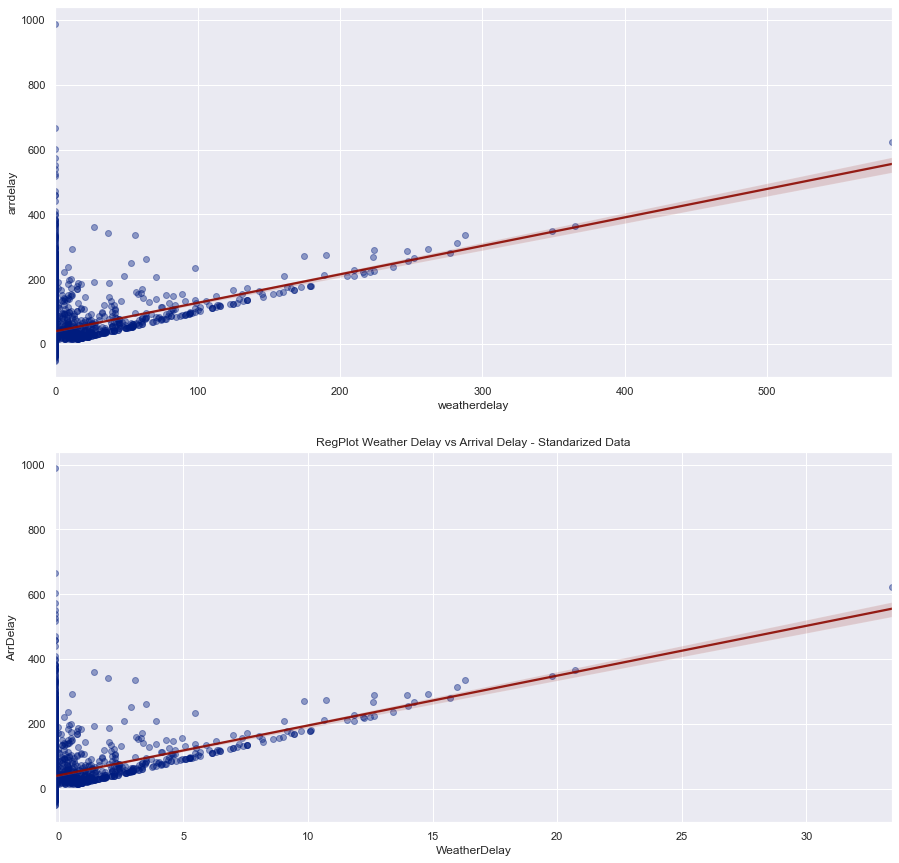

In [94]:
# Lets see the correlation and the regresion line between weather delay and arrival delay, after standarizing the data
fig03, ax3 = plt.subplots(ncols = 1, nrows = 2, figsize = (15,15))

fig02 = sns.regplot(x = df['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9}, ax=ax3[0])
plt.title('RegPlot Weather Delay vs Arrival Delay')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')

fig04 = sns.regplot(x = df_stand['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9}, ax=ax3[1])
plt.title('RegPlot Weather Delay vs Arrival Delay - Standarized Data')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')
fig04.figure.savefig(r'Plots\Fig04_RegPlot_WeatherDelay_vs_ArrivalDelay_StandarizedData.png')
plt.show()

fig03.savefig(r'Plots\Fig03_Comparison_normal_and_standarized_data.png')

We can observe there is no differences between the normal data and the standarized. Let's split in train and test, and do the regression.

#### Correlation and spliting in Training and Test

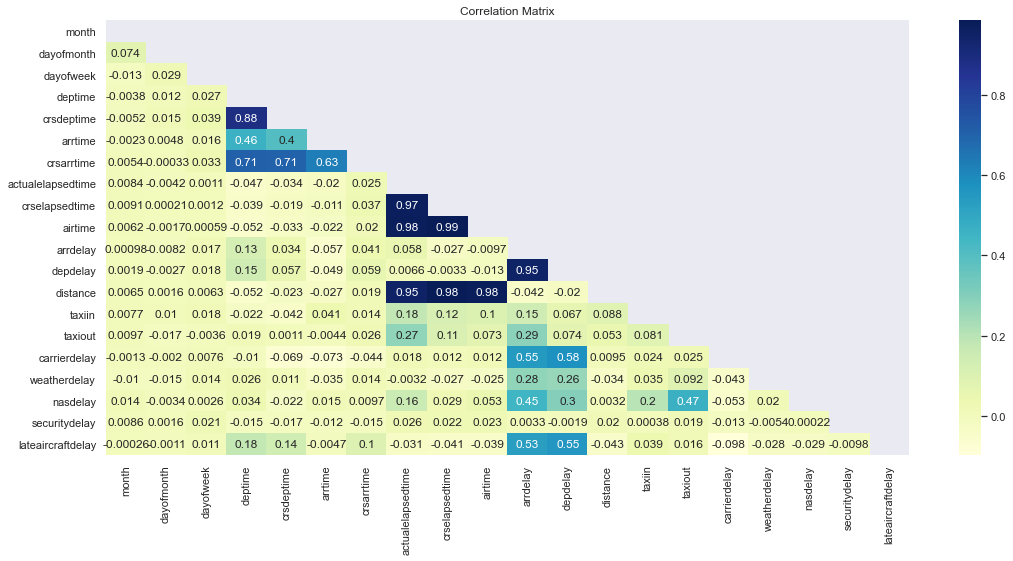

In [95]:
df_corr = df_stand.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True # This mask is to create the half matrix
fig05 = sns.heatmap(df_corr, annot=True, annot_kws={"fontsize":12}, cmap = "YlGnBu", mask = mask)
plt.title('Correlation Matrix')
plt.show()
fig05.figure.savefig(r'Plots\Fig05_CorrelationMatrix.png')

- We can see that the biggest correlation with the arrival delay is the departure delay. But we will use the nexts with more correlation: **taxiout, carrierdelay, weatherdelay, nasdelay and lateaircraftdelay**

In [96]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [97]:
# We define the target as "y" (ArrDelay), and the variables we think the most important as "X" (we keep "securitydelay" to check if it is important or not)
X = df_stand[['taxiout', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']]
y = df_stand['arrdelay']

# We add a constant: we are avoiding to force the model to go through the origin
X = sm.add_constant(X)

# We divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)
X_train.head()


,const,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
640,1.00,-0.64,-0.35,-0.14,-0.34,-0.04,-0.46
6868,1.00,-0.92,-0.35,-0.14,2.20,-0.04,0.72
2333,1.00,0.21,1.04,-0.14,-0.34,-0.04,-0.46
7593,1.00,-0.35,-0.35,-0.14,-0.34,-0.04,-0.46
6760,1.00,-0.14,-0.35,-0.14,-0.34,-0.04,-0.46


In [98]:
y_train.head()

640    -0.74
6868    1.26
2333    0.15
7593   -0.68
6760   -0.68
Name: arrdelay, dtype: float64

#### Linear Regression

In [99]:
model = sm.OLS(y_train, X_train).fit()
OLSpredictions = model.predict(X_test) # make the predictions by the model

# let's save the MSE and RMSE, and the R-Squared value, to compare later
mseOLS = mean_squared_error(y_test, OLSpredictions)
rmseOLS = mean_squared_error(y_test, OLSpredictions, squared=False)

OLSRsquared = model.rsquared

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               arrdelay   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.392e+05
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:00:07   Log-Likelihood:                 7222.4
No. Observations:                7462   AIC:                        -1.443e+04
Df Residuals:                    7455   BIC:                        -1.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0007      0.001     -0.663      0.508      -0.003       0.001
taxiout               0.0014      0.001      1.121      0.262      -0.001       0.004
carrierdelay          0.6476      0.001    586.132      0.000       0.645       0.650
weatherdelay          0.3136      0.001    273.522      0.000       0.311       0.316
nasdelay              0.4917      0.001    400.726      0.000       0.489       0.494
securitydelay         0.0192      0.001     20.074      0.000       0.017       0.021
lateaircraftdelay     0.6188      0.001    573.298      0.000       0.617       0.621
==============================================================================
Omnibus:                     2463.785   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35003.643
Skew:                          -1.184   Prob(JB):                         0.00
Kurtosis:                      13.343   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the Ordinary Least Square analysis we can see we have an almost 1 R-squared, meanning that we can explain the variance of 99,1% of the data. We can also observe that the constant it can be considered as 0: it's seems reasonable due to the flights they have no delay (or delay = 0).
- The function of the regresion line is composed by the constant (-0.0007) and the coefficients of each feature (0.0014 taxiout, 0,6476 carrierdelay, and so on)

We will see how it looks removing the taxiout and security variables: we think they don't contribute too much to the model

In [100]:
X2 = df_stand[['carrierdelay', 'weatherdelay', 'nasdelay', 'lateaircraftdelay']]
y2 = df_stand['arrdelay']

# We add a constant: we are avoiding to force the model to go through the origin
X2 = sm.add_constant(X2)

# We divide into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.75, random_state = 123)

model2 = sm.OLS(y2_train, X2_train).fit()
OLSpredictions2 = model2.predict(X2_test) # make the predictions by the model

mseOLS2 = mean_squared_error(y_test, OLSpredictions2)
rmseOLS2 = mean_squared_error(y_test, OLSpredictions2, squared=False)

OLS2Rsquared = model2.rsquared

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               arrdelay   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.980e+05
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:00:07   Log-Likelihood:                 7024.7
No. Observations:                7462   AIC:                        -1.404e+04
Df Residuals:                    7457   BIC:                        -1.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.001     -0.543      0.587      -0.003       0.002
carrierdelay          0.6474      0.001    571.760      0.000       0.645       0.650
weatherdelay          0.3135      0.001    267.609      0.000       0.311       0.316
nasdelay              0.4923      0.001    443.828      0.000       0.490       0.494
lateaircraftdelay     0.6187      0.001    558.791      0.000       0.616       0.621
==============================================================================
Omnibus:                     2019.560   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63697.923
Skew:                          -0.654   Prob(JB):                         0.00
Kurtosis:                      17.253   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we were assuming before, taxiout and securitydelay don't contribute to the model: we have now an R-squared of 99,1%, the same as before!

In [101]:
# Let's do the same with sklearn:
from sklearn import linear_model

In [102]:
lin_mod = linear_model.LinearRegression()
model3 = lin_mod.fit(X2_train,y2_train) # We fit the model
SKLRsquared = lin_mod.score(X2_train,y2_train) # ??

In [103]:
print(f'Intercept = {model3.intercept_}')
print(f'Slope of each feature = {model3.coef_}')

Intercept = -0.0005935680180535457
Slope of each feature = [0.         0.64736803 0.31354763 0.49232468 0.61865076]


In [104]:
SKLpredictions = lin_mod.predict(X2_test)
print(SKLpredictions)

mseSKL = mean_squared_error(y_test, SKLpredictions)
rmseSKL = mean_squared_error(y_test, SKLpredictions, squared=False)

[-0.25990395  0.00942402 -0.72318104 ... -0.72318104 -0.00992854
  1.04653922]


In [105]:
comparison_df = pd.DataFrame({"y_test":y2_test,"OLSpredictions":OLSpredictions, "OLSpredictions2":OLSpredictions2, "SKLpredictions":SKLpredictions})
comparison_df.sort_index(inplace=True)
comparison_df

,y_test,OLSpredictions,OLSpredictions2,SKLpredictions
3,-0.18,-0.15,-0.15,-0.15
4,-0.50,-0.72,-0.72,-0.72
6,-0.28,-0.26,-0.26,-0.26
7,-0.79,-0.72,-0.72,-0.72
10,-0.36,-0.33,-0.33,-0.33
...,...,...,...,...
9923,-0.68,-0.73,-0.72,-0.72
9928,-0.47,-0.44,-0.44,-0.44
9929,0.53,0.54,0.54,0.54
9930,-0.23,-0.21,-0.21,-0.21


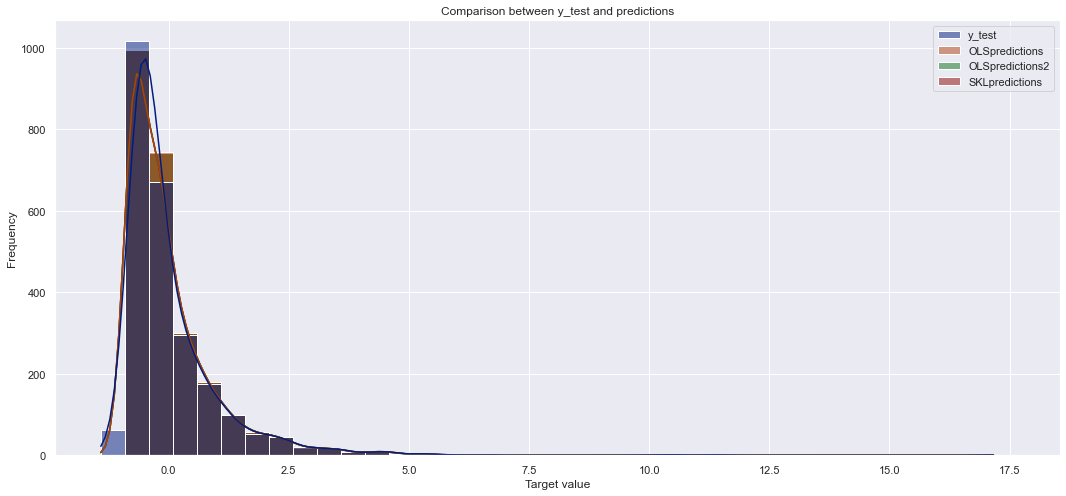

In [106]:
# Let's plot the predictions
fig06 = sns.histplot(data=comparison_df, binwidth=0.5, kde=True)
plt.title('Comparison between y_test and predictions')
plt.xlabel('Target value')
plt.ylabel('Frequency')
plt.show()
fig06.figure.savefig(r'Plots\Fig06_Comparison_between__y_test__and_predictions.png')

As we can see in the previous plot, the predictions are very similar to the y_tests values, so we have a good model using linear regresion (in fact, the predictions with the OLS method adding a constant are the same as the model with ScikitLearn)

#### Random Forest

We will use the same features as before: 'carrierdelay', 'weatherdelay', 'nasdelay', 'lateaircraftdelay'; and the target: 'arrdelay'.

In [107]:
# We have to convert the DataFrame in an array:
feature_list = ['carrierdelay', 'weatherdelay', 'nasdelay', 'lateaircraftdelay']
X = df_stand[feature_list]
y = df_stand['arrdelay']

X = np.array(X)
y = np.array(y)

# We divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)
X_train

array([[-0.34559908, -0.14081468, -0.34371948, -0.46146228],
       [-0.34559908, -0.14081468,  2.19518182,  0.71941777],
       [ 1.03506551, -0.14081468, -0.34371948, -0.46146228],
       ...,
       [-0.34559908, -0.14081468, -0.34371948, -0.46146228],
       [-0.34559908, -0.14081468, -0.34371948,  3.85883058],
       [-0.34559908, -0.14081468, -0.34371948,  1.0074373 ]])

In [108]:
# Let's create and train the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 123) # n_estimators default = 100
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [109]:
# We can now make predictions

predictions = rf.predict(X_test)

RF_r2_score = r2_score(y_test, predictions)
mseRF = mean_squared_error(y_test, predictions)
rmseRF = mean_squared_error(y_test, predictions, squared=False)

print(f'R-Squared: {RF_r2_score}')
print(f'MSE: {mseRF}')
print(f'RMSE: {rmseRF}')

R-Squared: 0.9520464714817485
MSE: 0.0544050373959489
RMSE: 0.2332488743723084


Let's visualize the forest

In [110]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [111]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

![full tree](tree.png "Full Tree")

In [112]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

![Small Tree](small_tree.png "Small Tree")

In [113]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: carrierdelay         Importance: 0.36
Variable: lateaircraftdelay    Importance: 0.34
Variable: nasdelay             Importance: 0.22
Variable: weatherdelay         Importance: 0.08


[None, None, None, None]

#### Neuronal Networks

In [114]:
# import required libraries
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import normalize

In [115]:
# Let's normalize the data
X_norm = pd.DataFrame(normalize(df[feature_list], norm="l2")) # We create as a dataframe to take a look to the data
y_norm = pd.DataFrame(normalize(df['arrdelay'].values.reshape(-1,1), norm='l2'))
print(X_norm.describe().transpose())
print(y_norm.describe().transpose())

    count  mean  std  min  25%  50%  75%  max
0 9950.00  0.24 0.39 0.00 0.00 0.00 0.40 1.00
1 9950.00  0.03 0.17 0.00 0.00 0.00 0.00 1.00
2 9950.00  0.17 0.33 0.00 0.00 0.00 0.15 1.00
3 9950.00  0.30 0.43 0.00 0.00 0.00 0.85 1.00
    count  mean  std   min  25%  50%  75%  max
0 9950.00  0.79 0.60 -1.00 1.00 1.00 1.00 1.00


In [116]:
# We need the data as arrays
X_norm = X_norm.values
y_norm = y_norm.values.reshape(-1,1)

In [117]:
# And split again in train and test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.75, random_state=123)
print(X_train.shape); print(X_test.shape)

(2487, 4)
(7463, 4)


In [118]:
# Let's create and fit the model
mlp = MLPClassifier(hidden_layer_sizes=(4,4,4), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(4, 4, 4), max_iter=500)

In [119]:
# We make the predictions and compute the Rsquared and errors (MSE and RMSE)
NNM_predictions = mlp.predict(X_test)
NNM_Rsquared = r2_score(y_test, NNM_predictions)
NNM_mse = mean_squared_error(y_test, NNM_predictions)
NNM_rmse = mean_squared_error(y_test, NNM_predictions, squared=False)

print(f'R-Squared: {NNM_Rsquared}')
print(f'MSE: {NNM_mse}')
print(f'RMSE: {NNM_rmse}')

R-Squared: -0.11860704699570435
MSE: 0.39742730805306176
RMSE: 0.630418359546311


### - Exercici 2:
Compara’ls en base al MSE i al R2

In [120]:
from prettytable import PrettyTable

In [121]:
# We have been saving the R-squared and MSE and RMSE of each method

t = PrettyTable(['Method', 'MSE', 'RMSE', 'R-Squared'])
t.add_row(['Linear Regression: OLS without constant', mseOLS, rmseOLS, OLSRsquared])
t.add_row(['Linear Regression: OLS with constant', mseOLS2, rmseOLS2, OLS2Rsquared])
t.add_row(['Linear Regression: Sklearn', mseSKL,rmseSKL,SKLRsquared])
t.add_row(['Random Forest', mseRF, rmseRF, RF_r2_score])
t.add_row(['Neural Newtworks', NNM_mse, NNM_rmse, NNM_Rsquared])
print(t)


+-----------------------------------------+----------------------+---------------------+----------------------+
|                  Method                 |         MSE          |         RMSE        |      R-Squared       |
+-----------------------------------------+----------------------+---------------------+----------------------+
| Linear Regression: OLS without constant | 0.007753546998571252 | 0.08805422760192297 |  0.9911531463118488  |
|   Linear Regression: OLS with constant  | 0.00784151216980286  | 0.08855231318154744 |  0.9906716719750495  |
|        Linear Regression: Sklearn       | 0.00784151216980281  | 0.08855231318154716 |  0.9906716719750495  |
|              Random Forest              |  0.0544050373959489  |  0.2332488743723084 |  0.9520464714817485  |
|             Neural Newtworks            | 0.39742730805306176  |  0.630418359546311  | -0.11860704699570435 |
+-----------------------------------------+----------------------+---------------------+----------------

It's important to note that with the actual parameters passed to the Neural Network Model, we have obtained a negative R-squared. Looking for an explanation, we found the following:
- R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. **R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.**

About the other models, we have obtained very good R-squared with the linear regression, explaining the 99% of the variance, and with very low Mean Squared Error. Better results than with the Random Forest model (although the results are not bad either)

### - Exerici 3: 
Entrena’ls utilitzant els diferents paràmetres que admeten.

https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10

In [122]:
# Let's use Lazypredict to found the better models to use
from lazypredict.Supervised import LazyRegressor, LazyClassifier

In [123]:
# fit all models with LazyRegressor
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:11<00:00,  3.76it/s]


Exception: Data must be 1-dimensional

In [ ]:
# fit all models with LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.02it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.74,0.57,None,0.79,0.03
NearestCentroid,0.66,0.57,None,0.75,0.02
DummyClassifier,0.81,0.34,None,0.80,0.02
AdaBoostClassifier,0.89,0.33,None,0.84,0.19
LogisticRegression,0.89,0.33,None,0.84,0.03
XGBClassifier,0.89,0.33,None,0.84,1.57
SVC,0.89,0.33,None,0.84,0.10
SGDClassifier,0.89,0.33,None,0.84,0.05
RidgeClassifierCV,0.89,0.33,None,0.84,0.02


### - Exercici 4:
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

- We had divided the dataframe in train and test

## Nivell 2

### - Exercici 5:
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

- We had clean the dataframe, modify NaN values, standarize and normalize values

## Nivell 3

### - Exercici 6:
No utilitzis la variable DepDelay a l’hora de fer prediccions

- Done during all the exercise